<a href="https://colab.research.google.com/github/evelyn323/CSC207-course-project-restaurant-app/blob/main/JSC270_HW2_EDA_Part_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries you'll likely need

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random
import math

###Importing data

In [ ]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

# Part III Regression Analysis

Begin by exploring the data to see which variables have linear relationship

In [ ]:
income94.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


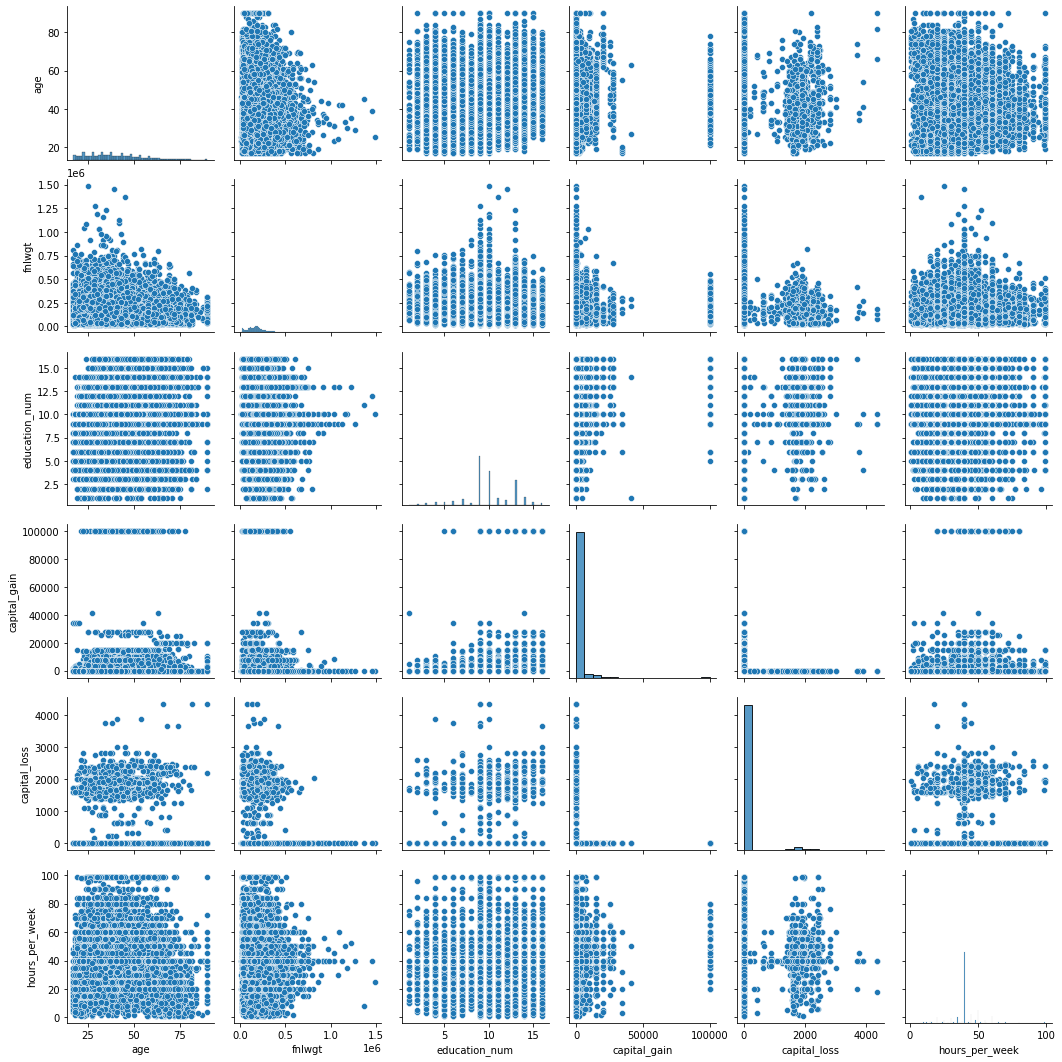

In [ ]:
# Pairplots for all numerical data 
_ = sns.pairplot(data=income94)

In [ ]:
# Correlations for all numerical data
corr = income94.corr()

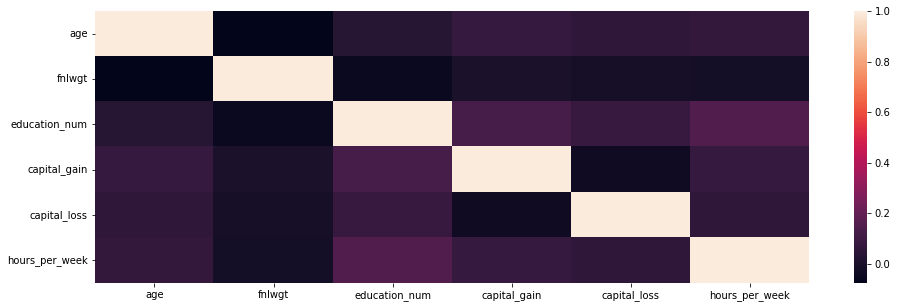

In [ ]:
# Heatmap of correlations for numerical data
plt.figure(figsize = (16,5))
sns.heatmap(corr, annot=False)
plt.show()

Try testing linear relationship between age and education num for male and female

In [ ]:
# Group the data by sex
income94_female = income94[income94.sex == " Female"]
income94_male = income94[income94.sex == " Male"]

###Model 1 predict hours_per_week from education_num

In [ ]:
# Fit a linear regression with hours_per_week against education_num for males 
reg1_male = smf.ols('hours_per_week ~ education_num', data = income94_male).fit()
print(reg1_male.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     415.4
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           1.73e-91
Time:                        00:10:33   Log-Likelihood:                -85075.
No. Observations:               21790   AIC:                         1.702e+05
Df Residuals:                   21788   BIC:                         1.702e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        36.1380      0.319    113.231

In [ ]:
# Fit a linear regression with hours_per_week against education_num for females 
reg1_female = smf.ols('hours_per_week ~ education_num', data = income94_female).fit()
print(reg1_female.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     355.4
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           4.97e-78
Time:                        00:10:33   Log-Likelihood:                -41702.
No. Observations:               10771   AIC:                         8.341e+04
Df Residuals:                   10769   BIC:                         8.342e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        27.5076      0.485     56.681

### Model 2 predict education_num from gross_income_group

In [ ]:
# Fit a linear regression with education_num against gross_income_group for males 
reg2_male = smf.ols('education_num ~ gross_income_group', data = income94_male).fit()
print(reg2_male.summary())

                            OLS Regression Results                            
Dep. Variable:          education_num   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     3419.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:10:33   Log-Likelihood:                -50669.
No. Observations:               21790   AIC:                         1.013e+05
Df Residuals:                   21788   BIC:                         1.014e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
# Fit a linear regression with education_num against gross_income_group for females 
reg2_female = smf.ols('education_num ~ gross_income_group', data = income94_female).fit()
print(reg2_female.summary())

                            OLS Regression Results                            
Dep. Variable:          education_num   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     768.0
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          2.43e-163
Time:                        00:10:34   Log-Likelihood:                -24251.
No. Observations:               10771   AIC:                         4.851e+04
Df Residuals:                   10769   BIC:                         4.852e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
# Fit a linear regression with education_num against gross_income_group and sex
reg2 = smf.ols('education_num ~ gross_income_group + sex', data = income94).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:          education_num   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     2139.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:38:15   Log-Likelihood:                -74961.
No. Observations:               32561   AIC:                         1.499e+05
Df Residuals:                   32558   BIC:                         1.500e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
pred2 = reg2.predict(income94[['gross_income_group', 'sex']])
rmse_2 = math.sqrt(np.square(np.subtract(income94['education_num'], pred2)).mean())
print(rmse_2)

2.4187061994594115


In [ ]:
# Fit a linear regression with education_num against gross_income_group and sex
reg2a = smf.ols('education_num ~ sex', data = income94).fit()
print(reg2a.summary())

                            OLS Regression Results                            
Dep. Variable:          education_num   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.911
Date:                Mon, 07 Feb 2022   Prob (F-statistic):             0.0267
Time:                        00:27:52   Log-Likelihood:                -76968.
No. Observations:               32561   AIC:                         1.539e+05
Df Residuals:                   32559   BIC:                         1.540e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.0357      0.025    404.866   

### Model 3 predict hours_per_week from gross_income_group and education_num and age

In [ ]:
# Fit a linear regression with hours_per_week against education_num and gross_income_group and age for males 
reg3_male = smf.ols('hours_per_week ~ gross_income_group + education_num + age', data = income94_male).fit()
print(reg3_male.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     387.8
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          1.98e-245
Time:                        00:10:34   Log-Likelihood:                -84714.
No. Observations:               21790   AIC:                         1.694e+05
Df Residuals:                   21786   BIC:                         1.695e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
# Fit a linear regression with hours_per_week against education_num and gross_income_group and age for females 
reg3_female = smf.ols('hours_per_week ~ gross_income_group + education_num + age', data = income94_female).fit()
print(reg3_female.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     162.2
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          8.15e-103
Time:                        00:10:35   Log-Likelihood:                -41639.
No. Observations:               10771   AIC:                         8.329e+04
Df Residuals:                   10767   BIC:                         8.332e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
# Fit a linear regression with hours_per_week against education_num and gross_income_group and age
reg3 = smf.ols('education_num ~ gross_income_group', data = income94).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:          education_num   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     4120.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:10:35   Log-Likelihood:                -75031.
No. Observations:               32561   AIC:                         1.501e+05
Df Residuals:                   32559   BIC:                         1.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

## Decide to try and predict hours_per_week from gross_income_group and education_num and sex. 
### SAME AS Q1 in Part 2 Regression

### Model 3a: 
predict hours_per_week from sex

### Model 3b:
predict hours_per_week from sex and education_num

### Model 3c: 
predict hours_per_week from gross_income_group and education_num and sex.

### Model 3d:
predict hours_per_week from gross_income_group and sex.

In [ ]:
# Separate into training and testing datasets 
income94_train = income94.sample(frac = 0.8, random_state = 613)
income94_test = income94.drop(income94_train.index)

In [ ]:
reg1_train = smf.ols('hours_per_week ~ sex', data = income94_train).fit()
print(reg1_train.summary())

reg2_train = smf.ols('hours_per_week ~ sex + education_num', data = income94_train).fit()
print(reg2_train.summary())

reg3_train = smf.ols('hours_per_week ~ sex + education_num + gross_income_group', data = income94_train).fit()
print(reg3_train.summary())

reg4_train = smf.ols('hours_per_week ~ sex + education_num + gross_income_group + age', data = income94_train).fit()
print(reg4_train.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1351.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          2.68e-288
Time:                        00:10:35   Log-Likelihood:            -1.0175e+05
No. Observations:               26049   AIC:                         2.035e+05
Df Residuals:                   26047   BIC:                         2.035e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.5473      0.130    281.964   

In [ ]:
# Make predictions for testing data using training model
pred1_test = reg1_train.predict(income94_test[['sex']])
pred2_test = reg2_train.predict(income94_test[['sex', 'education_num']])
pred3_test = reg3_train.predict(income94_test[['sex', 'education_num', 'gross_income_group']])
pred4_test = reg4_train.predict(income94_test[['sex', 'education_num', 'gross_income_group', 'age']])

# Make predictions for training data using training model
pred1_train = reg1_train.predict(income94_train[['sex']])
pred2_train = reg2_train.predict(income94_train[['sex', 'education_num']])
pred3_train = reg3_train.predict(income94_train[['sex', 'education_num', 'gross_income_group']])
pred4_train = reg4_train.predict(income94_train[['sex', 'education_num', 'gross_income_group', 'age']])


In [ ]:
# Calculate the RMSE for testing data
rmse_test_1 = math.sqrt(np.square(np.subtract(income94_test['hours_per_week'], pred1_test)).mean())
rmse_test_2 = math.sqrt(np.square(np.subtract(income94_test['hours_per_week'], pred2_test)).mean())
rmse_test_3 = math.sqrt(np.square(np.subtract(income94_test['hours_per_week'], pred3_test)).mean())
rmse_test_4 = math.sqrt(np.square(np.subtract(income94_test['hours_per_week'], pred4_test)).mean())

# Calculate the RMSE for training data
rmse_train_1 = math.sqrt(np.square(np.subtract(income94_train['hours_per_week'], pred1_train)).mean())
rmse_train_2 = math.sqrt(np.square(np.subtract(income94_train['hours_per_week'], pred2_train)).mean())
rmse_train_3 = math.sqrt(np.square(np.subtract(income94_train['hours_per_week'], pred3_train)).mean())
rmse_train_4 = math.sqrt(np.square(np.subtract(income94_train['hours_per_week'], pred4_train)).mean())

# Calculate the ratio of RMSE
rmse_1_ratio = rmse_test_1 / rmse_train_1
rmse_2_ratio = rmse_test_2 / rmse_train_2
rmse_3_ratio = rmse_test_3 / rmse_train_3
rmse_4_ratio = rmse_test_4 / rmse_train_4

In [ ]:
# Make the RMSE into a table to display
rmse_dict = {'Model':['Model 1', 'Model 2', 'Model 3', 'Model 4'],
             'RMSE Test Data': [rmse_test_1, rmse_test_2, rmse_test_3, rmse_test_4],
             'RMSE Train Data': [rmse_train_1, rmse_train_2, rmse_train_3, rmse_train_4], 
             'Ratio of RMSE': [rmse_1_ratio, rmse_2_ratio, rmse_3_ratio, rmse_4_ratio]}
rmse_df = pd.DataFrame(rmse_dict)
print(rmse_df)

     Model  RMSE Test Data  RMSE Train Data  Ratio of RMSE
0  Model 1       11.986154        12.026679       0.996630
1  Model 2       11.890788        11.882416       1.000705
2  Model 3       11.753030        11.750545       1.000211
3  Model 4       11.754634        11.749095       1.000471
